### Familiarize with CV2 Object Detection Library

### Transfer Learning

In [ ]:
import torch
from torchvision import transforms
import glob
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import torchvision

In [2]:
from PIL import Image
import requests
from io import BytesIO

In [3]:
!git clone https://github.com/PranavM98/Facial-Detection-and-Emotion-Classifier.git Facial-Detection-and-Emotion-Classifier
from PIL import Image

Cloning into 'Facial-Detection-and-Emotion-Classifier'...
remote: Enumerating objects: 19069, done.
remote: Counting objects: 100% (19069/19069), done.
remote: Compressing objects: 100% (17298/17298), done.
remote: Total 19069 (delta 34), reused 19048 (delta 17), pack-reused 0
Receiving objects: 100% (19069/19069), 115.42 MiB | 16.17 MiB/s, done.
Resolving deltas: 100% (34/34), done.
Checking out files: 100% (26479/26479), done.


In [4]:
!pwd

/content


In [6]:
data = pd.read_csv('/content/Facial-Detection-and-Emotion-Classifier/00_Data/01_Transformed_Data/face_detection_data.csv')
data.head()

,Filename,xmin,ymin,xmax,ymax,label
0,Kevin_Gil_0001.jpg,71,69,180,178,1
1,Gerry_Kelly_0001.jpg,72,71,176,175,1
2,Eliane_Karp_0003.jpg,60,66,183,189,1
3,Vojislav_Kostunica_0006.jpg,66,67,183,184,1
4,Phil_Johnson_0001.jpg,64,64,186,186,1


In [7]:
# Load the cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

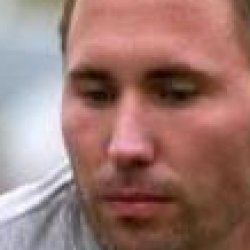

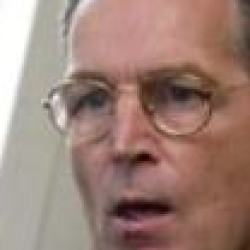

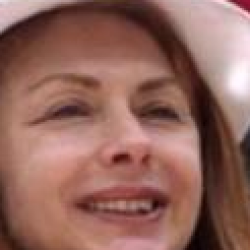

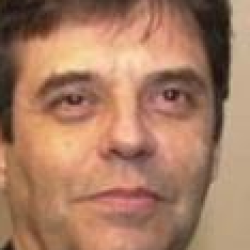

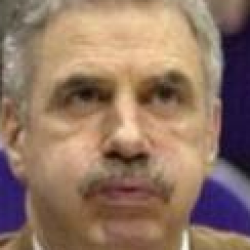

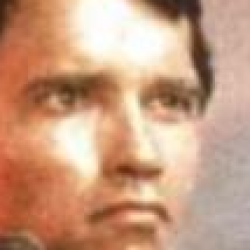

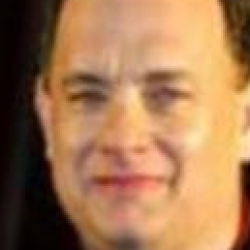

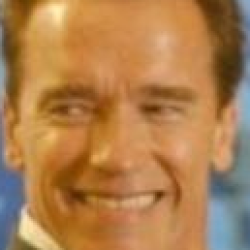

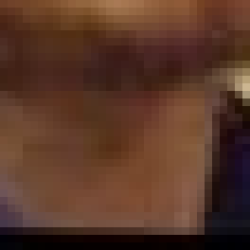

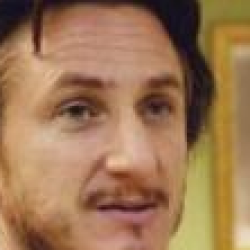

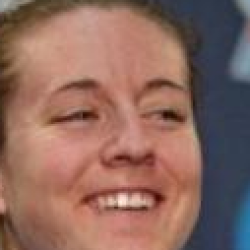

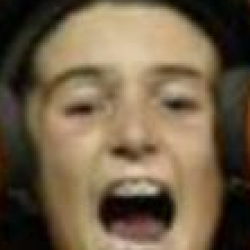

In [19]:
from google.colab.patches import cv2_imshow
#Storing the tensor images
images=[]

#Storing the targets - boxes and labels
targets=[]

#Convert image to tensor
convert_tensor = transforms.ToTensor()

#Iterating over all images in dataset
a=0
for i, r in data.iterrows():


    # Recreate file-path
    image_file_path = data.loc[i,'Filename']
    image_file_path = '/content/Facial-Detection-and-Emotion-Classifier/00_Data/01_Transformed_Data/Face_Detection_Images/' + image_file_path



    img = cv2.imread(image_file_path)
    #cv2.imshow('img',img)
    # Convert into grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #cv2.imshow(gray)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    #Storing in the Dataframe
    
    for (x, y, w, h) in faces:
        #startpoint, endpoint, color, thickness
        #cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

        cropped_img= img[x:x+w, y:y+h]
        i=cv2.resize(cropped_img, (250,250), interpolation = cv2.INTER_AREA)
        cv2_imshow(i)


    if a==10:
      break
    a+=1

        

    
